In [55]:
# Import required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, callbacks,datasets
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

In [56]:
# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

In [57]:
# Normalize pixel values to range [0,1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [58]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

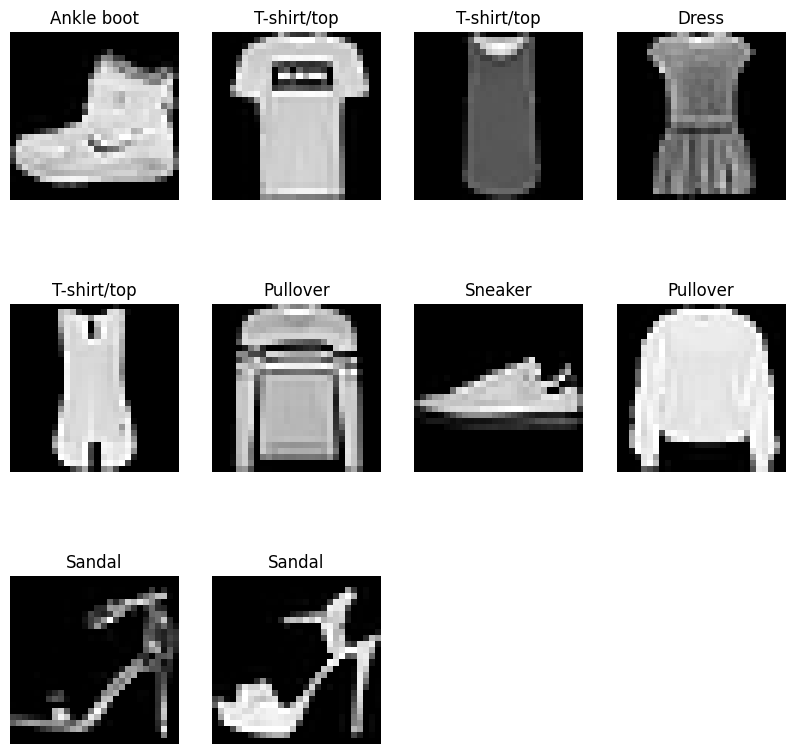

In [59]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
# Visualize sample images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

In [60]:
#early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7)
    
# Model Checkpoint
checkpoint=callbacks.ModelCheckpoint(
        'best_model.keras',
        monitor='val_accuracy',
        save_best_only=True
    ),


In [61]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    layers.BatchNormalization(),
    # Increase network capacity
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(10, activation='softmax')
])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [62]:
# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomTranslation(0.1, 0.1)
])

In [63]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245,898 (960.54 KB)

 Trainable params: 244,330 (954.41 KB)

 Non-trainable params: 1,568 (6.12 KB)

In [64]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=50,
    validation_split=0.2,
    callbacks=[ lr_scheduler,checkpoint],
    verbose=1
)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4745 - loss: 1.5440 - val_accuracy: 0.7795 - val_loss: 0.8927 - learning_rate: 0.0010
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7709 - loss: 0.6616 - val_accuracy: 0.8384 - val_loss: 0.5437 - learning_rate: 0.0010
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8075 - loss: 0.5601 - val_accuracy: 0.8497 - val_loss: 0.4407 - learning_rate: 0.0010
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8264 - loss: 0.5149 - val_accuracy: 0.8609 - val_loss: 0.3928 - learning_rate: 0.0010
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8424 - loss: 0.4599 - val_accuracy: 0.8668 - val_loss: 0.3746 - learning_rate: 0.0010
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8462 - loss: 0.4513 - val_accuracy: 0.8698 - val_loss: 0.3603 - learning_rate: 0.0010
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8568 - loss: 0.4199 - val_accuracy: 

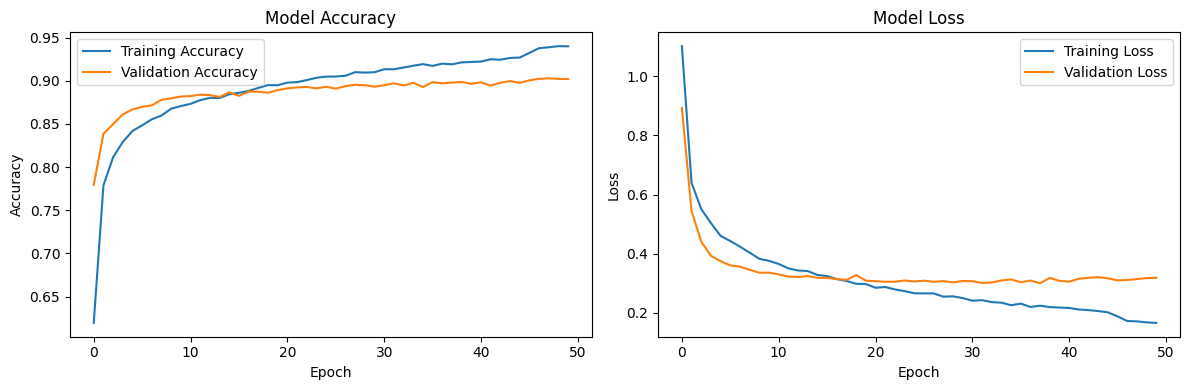

In [65]:
# Plot training history
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Accuracy plot
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    # Loss plot
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)

In [75]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_accuracy:.2f}')
print(f'Test loss: {test_loss:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.9008 - loss: 0.3406

Test accuracy: 0.90
Test loss: 0.3400


In [67]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    """Plot confusion matrix with better visualization"""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [68]:
def plot_classification_metrics(classification_dict):
    """Plot precision, recall, and F1-score for each class"""
    metrics_df = pd.DataFrame(classification_dict).transpose()
    metrics_df = metrics_df.drop('support', axis=1)  # Remove support column
    
    # Create bar plot
    ax = metrics_df.plot(kind='bar', figsize=(15, 6), width=0.8)
    plt.title('Classification Metrics by Class')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, axis='y')
    plt.tight_layout()
    
    # Add value labels on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3)
    
    plt.show()

In [69]:
# Fashion MNIST class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred_classes, 
                             target_names=class_names, 
                             output_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step


In [70]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.85      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.81      0.82      0.82      1000
       Dress       0.89      0.93      0.91      1000
        Coat       0.83      0.84      0.83      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.74      0.70      0.72      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000




Plotting Confusion Matrix...


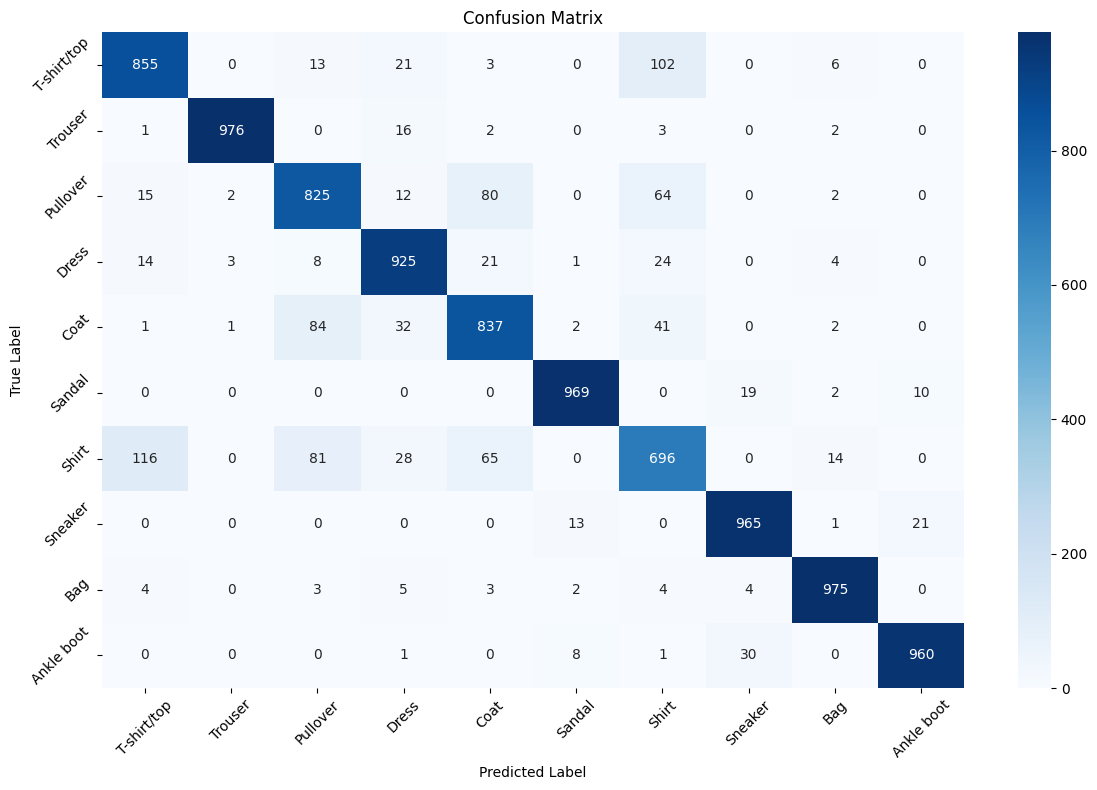


Plotting Classification Metrics...


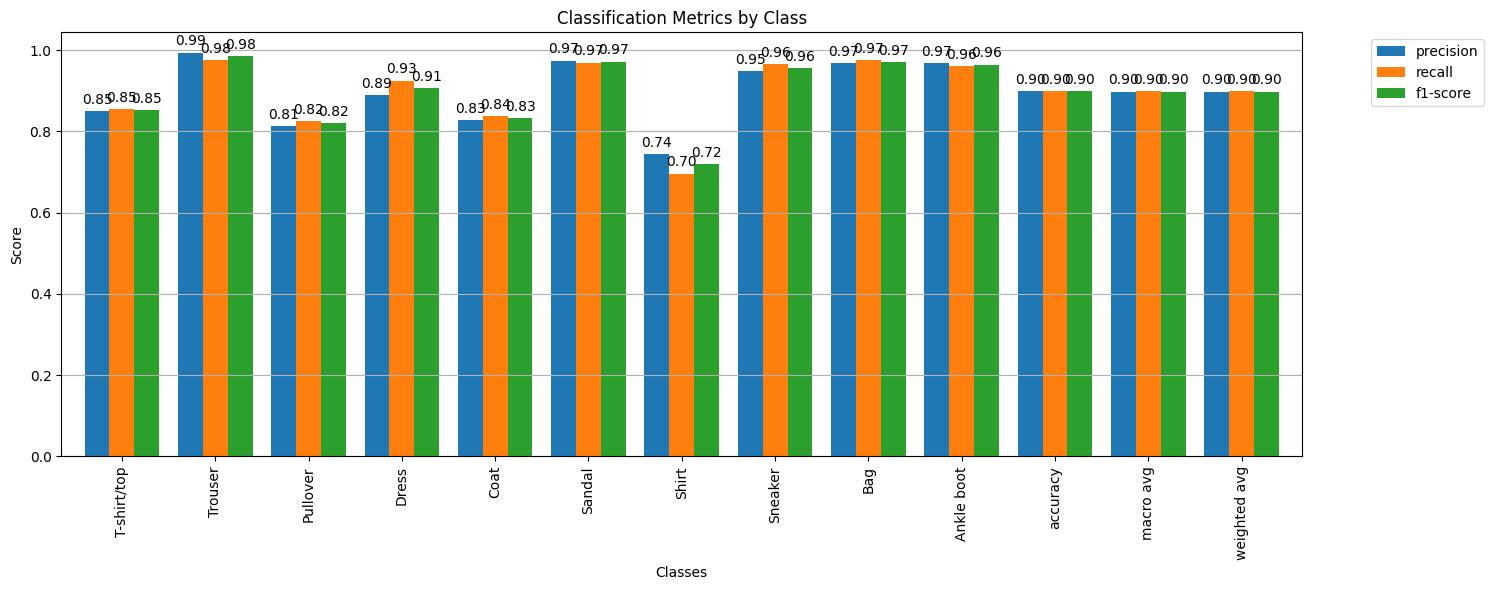

In [71]:
print("\nPlotting Confusion Matrix...")
plot_confusion_matrix(y_test, y_pred_classes, class_names)

print("\nPlotting Classification Metrics...")
plot_classification_metrics(report)

In [72]:
# Calculate and print additional metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

overall_accuracy = accuracy_score(y_test, y_pred_classes)
overall_precision = precision_score(y_test, y_pred_classes, average='weighted')
overall_recall = recall_score(y_test, y_pred_classes, average='weighted')
overall_f1 = f1_score(y_test, y_pred_classes, average='weighted')

print("\nOverall Metrics:")
print(f"Accuracy: {overall_accuracy:.4f}")
print(f"Precision: {overall_precision:.4f}")
print(f"Recall: {overall_recall:.4f}")
print(f"F1-Score: {overall_f1:.4f}")


Overall Metrics:
Accuracy: 0.8983
Precision: 0.8977
Recall: 0.8983
F1-Score: 0.8979
